![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Visualización de datos - Ejercicios

A lo largo de este tutorial, utilizará un conjunto de datos del mercado de valores norteamericano de 29 empresas de 2006 a 2017. Se nos pide:

1. Preparar los datasets para crear visualizaciones
2. Graficar la siguiente información:
    - Precio de cierre de AAPL, JPM, GOOGL y AMZN para todo el período de estudio.
    - Precio máximo de AAPL en 2014, 2015, 2016 y 2017.
    - Distribución del volumen de transacciones por empresa para todo el período. Sólo incluir AAPL, JPM, GOOGL y AMZN.
    - Volumen de transacciones anual de AAPL, JPM, GOOGL y AMAZN. En el mismo gráfico debo poder comparar el volumen por año y la proporción de este que corresponde a cada empresa.
    - Relación entre los retornos diarios (`Open` - `Close` / `Open`) de las acciones de GOOGL y AMZN durante todo el período de estudio.
    
    
## Diccionario de datos

El dataset tiene las siguientes columnas:

- **Date:** fecha correspondiente al valor observado
- **Open:** Precio (en USD) al mercado abierto en la fecha especificada
- **High:** precio más alto (en USD) alcanzado durante la fecha correspondiente
- **Low:** precio más bajo (en USD) alcanzado durante la fecha correspondiente
- **Close:** Precio (en USD) al cierre del mercado en la fecha especificada
- **Volumen:** número de acciones negociadas
- **Name:** Símbolo bursátil de la empresa.


## Importar librerías y leer datos

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pandas as pd

url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

## Revisiones generales

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    93612 non-null  object 
 1   Open    93587 non-null  float64
 2   High    93602 non-null  float64
 3   Low     93592 non-null  float64
 4   Close   93612 non-null  float64
 5   Volume  93612 non-null  int64  
 6   Name    93612 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [28]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [29]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [30]:
df['Name'].unique(), df['Close'].unique()

(array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
        'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
        'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
        'GOOGL', 'AMZN', 'AABA'], dtype=object),
 array([79.11, 78.71, 77.99, ..., 14.78, 15.73, 11.77]))

## Precio de cierre de AAPL, JPM, GOOGL y AMZN para todo el período de estudio

In [31]:
filtro_company = df['Name'].isin(['AAPL','JPM','GOOGL','AMZN'])
filtro_company
df_close = df.loc[filtro_company,['Name','Close','Date']].sort_values('Close',ascending=False)
df_close



,Name,Close,Date
90569,AMZN,1195.83,2017-11-27
90570,AMZN,1193.60,2017-11-28
90584,AMZN,1190.58,2017-12-18
90585,AMZN,1187.38,2017-12-19
90591,AMZN,1186.10,2017-12-28
...,...,...,...
6171,AAPL,7.57,2006-07-12
6175,AAPL,7.56,2006-07-18
6174,AAPL,7.48,2006-07-17
6172,AAPL,7.46,2006-07-13


In [32]:
df['Close'].min(),df['Date'].unique()

(6.66,
 array(['2006-01-03', '2006-01-04', '2006-01-05', ..., '2017-12-27',
        '2017-12-28', '2017-12-29'], dtype=object))

In [33]:
df_close['Name'].unique()

array(['AMZN', 'GOOGL', 'AAPL', 'JPM'], dtype=object)

In [44]:
fig = px.line(data_frame=df_close, x="Date", y="Close",color='Name', title="Precio de cierre de AAPL en 2014, 2015, 2016 y 2017")
fig.show()

## Precio máximo de AAPL en 2014, 2015, 2016 y 2017

In [34]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Name              object
dtype: object

In [36]:
df['Year'] = df.Date.dt.year

df

,Date,Open,High,Low,Close,Volume,Name,Year
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006
...,...,...,...,...,...,...,...,...
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA,2017
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA,2017
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA,2017
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA,2017


In [37]:
df['Date'].min(),df['Date'].max()

(Timestamp('2006-01-03 00:00:00'), Timestamp('2017-12-29 00:00:00'))

In [38]:
#filtro_date_aapl =  df["Date"].isin(pd.date_range(start = '2014-01-01', end = '2014-12-31')) 

In [39]:
filtro_aapl = df['Name'] == 'AAPL'

filtro_date_aapl = df['Year'].isin([2014, 2015, 2016 ,2017])
df_aapl = df.loc[(filtro_aapl)&(filtro_date_aapl),['High', 'Year']].groupby('Year').agg({'High':'max'}).reset_index()
df_aapl




,Year,High
0,2014,119.75
1,2015,134.54
2,2016,118.69
3,2017,177.20


In [42]:
fig = px.line(data_frame=df_aapl, x="Year", y="High", title="Precio máximo de AAPL en 2014, 2015, 2016 y 2017")
fig.show()

## Distribución del volumen de transacciones por empresa par todo el período. Sólo incluir AAPL, JPM, GOOGL y AMZN

In [ ]:
filtro_company = df['Name'].isin(['AAPL','JPM','GOOGL','AMZN'])
filtro_company
df_volume = df.loc[filtro_company,['Name','Volume','Date','High']].sort_values('Volume',ascending=False)
df_volume


,Name,Volume,Date,High
6556,AAPL,843264044,2008-01-23,20.00
6295,AAPL,838036682,2007-01-09,13.28
6296,AAPL,739605951,2007-01-10,13.97
6105,AAPL,666021972,2006-04-06,10.29
6729,AAPL,655513663,2008-09-29,17.10
...,...,...,...,...
86562,GOOGL,734170,2013-12-24,558.18
87548,GOOGL,726898,2017-11-22,1055.43
87047,GOOGL,722319,2015-11-27,774.00
87298,GOOGL,613549,2016-11-25,782.90


In [ ]:

fig = px.pie(data_frame=df_volume, values="Volume", names="Name", hole=0.5, title='Distribución del volumen de transacciones por empresa')
fig.show()

## Volumen de transacciones anual de AAPL, JPM, GOOGL y AMAZN. En el mismo gráfico debo poder comparar el volumen por año y la proporción de este correspondiente a cada empresa.

In [ ]:
df_volume['Year'] = df_volume['Date'].dt.year
df_volume

,Name,Volume,Date,High,Year
6556,AAPL,843264044,2008-01-23,20.00,2008
6295,AAPL,838036682,2007-01-09,13.28,2007
6296,AAPL,739605951,2007-01-10,13.97,2007
6105,AAPL,666021972,2006-04-06,10.29,2006
6729,AAPL,655513663,2008-09-29,17.10,2008
...,...,...,...,...,...
86562,GOOGL,734170,2013-12-24,558.18,2013
87548,GOOGL,726898,2017-11-22,1055.43,2017
87047,GOOGL,722319,2015-11-27,774.00,2015
87298,GOOGL,613549,2016-11-25,782.90,2016


In [ ]:
df_volume.sort_values(by = 'Volume',ascending=False, inplace=True)
df_volume

,Name,Volume,Date,High,Year
6556,AAPL,843264044,2008-01-23,20.00,2008
6295,AAPL,838036682,2007-01-09,13.28,2007
6296,AAPL,739605951,2007-01-10,13.97,2007
6105,AAPL,666021972,2006-04-06,10.29,2006
6729,AAPL,655513663,2008-09-29,17.10,2008
...,...,...,...,...,...
86562,GOOGL,734170,2013-12-24,558.18,2013
87548,GOOGL,726898,2017-11-22,1055.43,2017
87047,GOOGL,722319,2015-11-27,774.00,2015
87298,GOOGL,613549,2016-11-25,782.90,2016


Text(0.5, 1.0, 'Daily deaths by Country')

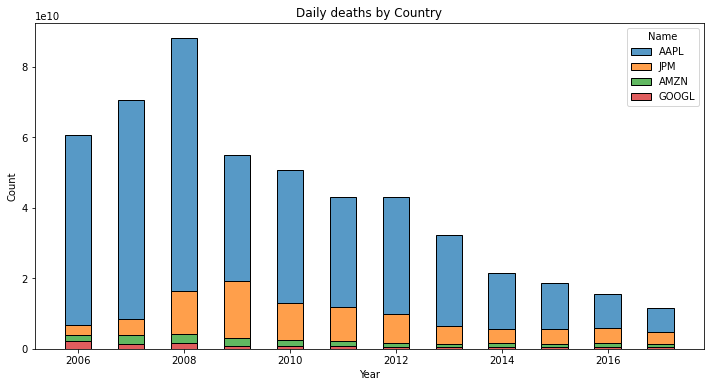

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=df_volume, x="Year", hue="Name", weights="Volume", discrete=True, shrink=0.5, multiple="stack")
ax.set_title("Daily deaths by Country")

## Relación entre los retornos diarios (`Open` - `Close` / `Open`) de las acciones de GOOGL y AMZN durante todo el período de estudio

In [ ]:
filtro_tres = df['Name'].isin(['GOOGL','AMZN'])
filtro_tres
df_retorno = df.loc[filtro_tres,['Name','Open','Close','Date']].sort_values('Open',ascending=False)
df_retorno['retorno_diario'] = (df_retorno['Open']-df_retorno['Close'])/df_retorno['Open']
df_retorno

,Name,Open,Close,Date,retorno_diario
90570,AMZN,1204.88,1193.60,2017-11-28,0.009362
90569,AMZN,1202.66,1195.83,2017-11-27,0.005679
90571,AMZN,1194.80,1161.27,2017-11-29,0.028063
90586,AMZN,1190.50,1177.62,2017-12-20,0.010819
90585,AMZN,1189.15,1187.38,2017-12-19,0.001488
...,...,...,...,...,...
87727,AMZN,26.43,26.07,2006-08-11,0.013621
87728,AMZN,26.22,26.53,2006-08-14,-0.011823
87726,AMZN,26.20,26.49,2006-08-10,-0.011069
87720,AMZN,26.15,26.09,2006-08-02,0.002294


In [ ]:
fig = px.pie(data_frame=df_retorno, values="retorno_diario", names="Name", hole=0.5, title='Relación entre los retornos diarios')
fig.show()